In [1]:
import pandas as pd
from datetime import timezone

In [2]:
sensors = pd.read_csv('sensors.csv')

In [3]:
sensors

,sds_sensor,bme_sensor,lat,lon,sealevel,surface_alt,surface_level
0,43811,43812,55.703017,37.459441,198.271350,163.0,35.271350
1,46280,46281,55.677867,37.456325,179.684930,176.0,3.684930
2,33626,33627,55.874089,37.510001,167.960469,176.0,-8.039531
3,54815,54816,55.752000,37.884000,236.385167,153.0,83.385167
4,45568,45569,55.625773,37.525268,263.580603,230.0,33.580603
...,...,...,...,...,...,...,...
174,42920,42921,55.850951,37.348591,193.647666,176.0,17.647666
175,41097,41098,55.563750,37.644380,169.748722,175.0,-5.251278
176,48427,48428,55.595953,37.598865,194.379092,172.0,22.379092
177,35514,35515,55.650000,37.490000,222.588161,200.0,22.588161


In [4]:
p1_med = pd.read_csv('../DATA/processed/dataset.csv', parse_dates=['date']).set_index('date').P1_p50
p2_med = pd.read_csv('../DATA/processed/dataset.csv', parse_dates=['date']).set_index('date').P2_p50

In [5]:
p2_med

date
2019-04-01 00:00:00+00:00    2.9575
2019-04-01 00:05:00+00:00    2.6900
2019-04-01 00:10:00+00:00    2.7600
2019-04-01 00:15:00+00:00    2.8400
2019-04-01 00:20:00+00:00    2.6175
                              ...  
2021-01-18 17:40:00+00:00       NaN
2021-01-18 17:45:00+00:00       NaN
2021-01-18 17:50:00+00:00       NaN
2021-01-18 17:55:00+00:00       NaN
2021-01-18 18:00:00+00:00       NaN
Name: P2_p50, Length: 189721, dtype: float64

In [6]:
def get_diff(sds_id):
    try:
        file_name = f'{sds_id}_sds011_sensor_.csv'
        sds_data = pd.read_csv('../DATA/raw/sensors/'+file_name, sep=';', parse_dates=['timestamp'])
        sds_data = sds_data.set_index('timestamp').resample('5T').mean()
        sds_data = sds_data.tz_localize(timezone.utc)
        return (sds_data.P1 - p1_med).median(), (sds_data.P2 - p2_med).median()
    except:
        return None, None

In [7]:
p1_diff = []
p2_diff = []
for index, row in sensors.iterrows():
    p1, p2 = get_diff(int(row['sds_sensor']))
    p1_diff.append(p1)
    p2_diff.append(p2)
    
sensors['p1_diff'] = p1_diff
sensors['p2_diff'] = p2_diff

//home/anatoly/HDD/anaconda3/envs/mlforair/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3249: DtypeWarning: Columns (6,9) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
//home/anatoly/HDD/anaconda3/envs/mlforair/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [8]:
sensors

,sds_sensor,bme_sensor,lat,lon,sealevel,surface_alt,surface_level,p1_diff,p2_diff
0,43811,43812,55.703017,37.459441,198.271350,163.0,35.271350,-3.082500,-2.253333
1,46280,46281,55.677867,37.456325,179.684930,176.0,3.684930,-1.212500,-0.165000
2,33626,33627,55.874089,37.510001,167.960469,176.0,-8.039531,5.105000,0.800000
3,54815,54816,55.752000,37.884000,236.385167,153.0,83.385167,-5.058750,-2.211250
4,45568,45569,55.625773,37.525268,263.580603,230.0,33.580603,-0.601250,-0.277500
...,...,...,...,...,...,...,...,...,...
174,42920,42921,55.850951,37.348591,193.647666,176.0,17.647666,1.058333,-1.585000
175,41097,41098,55.563750,37.644380,169.748722,175.0,-5.251278,1.491161,1.223274
176,48427,48428,55.595953,37.598865,194.379092,172.0,22.379092,0.975000,-0.442500
177,35514,35515,55.650000,37.490000,222.588161,200.0,22.588161,-1.535000,-0.550000


In [9]:
sensors.plot.scatter('sealevel', 'p1_diff'), sensors.plot.scatter('surface_level', 'p1_diff')

(<AxesSubplot:xlabel='sealevel', ylabel='p1_diff'>,
 <AxesSubplot:xlabel='surface_level', ylabel='p1_diff'>)

(<AxesSubplot:xlabel='sealevel', ylabel='p2_diff'>,
 <AxesSubplot:xlabel='surface_level', ylabel='p2_diff'>)

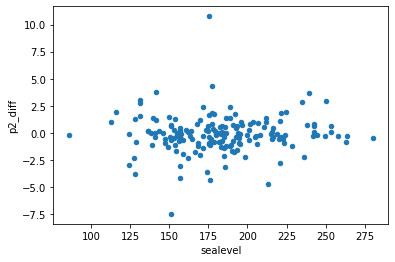

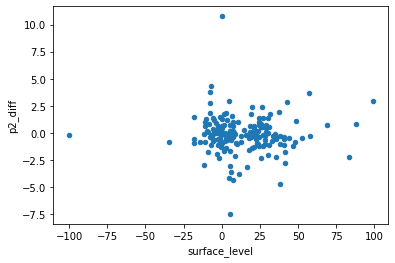

In [10]:
sensors.plot.scatter('sealevel', 'p2_diff'), sensors.plot.scatter('surface_level', 'p2_diff')

In [11]:
sensors[['sealevel','surface_level', 'surface_alt', 'p1_diff', 'p2_diff']].corr()

,sealevel,surface_level,surface_alt,p1_diff,p2_diff
sealevel,1.000000,0.700772,0.768004,0.027505,0.055652
surface_level,0.700772,1.000000,0.081312,-0.047103,-0.001086
surface_alt,0.768004,0.081312,1.000000,0.081032,0.078720
p1_diff,0.027505,-0.047103,0.081032,1.000000,0.869988
p2_diff,0.055652,-0.001086,0.078720,0.869988,1.000000


In [12]:
len(sensors)

179